Generating the test cases

In [3]:
import random
vertices = 10000
test_type = "random"

edges = random.randint(0, vertices * (vertices-1))

print(edges)

16341165


In [ ]:
file = open("C://Users/yihao/Desktop/NTU Y2 S1/CZ2101 Algorithm Design and Analysis/Example Class/EC2/dijkstra/random.txt","a")
all_eg = []
while(edges > 0):
    v1 = random.randint(1, vertices)
    v2 = random.randint(1, vertices)
    edge_value = random.randint(1, 100)

    if(v1 != v2 and (v1, v2) not in all_eg):
        file.write("{} {} {}\n".format(v1, v2, edge_value))
        all_eg.append((v1, v2))
        edges-=1
file.close()

In [ ]:
file = open("C://Users/yihao/Desktop/NTU Y2 S1/CZ2101 Algorithm Design and Analysis/Example Class/EC2/dijkstra/random.txt","a")
for i in range(vertices):
    for j in range(vertices):
        if i != j:
            edge_value = random.randint(1, 100)
            file.write("{} {} {}\n".format(i+1, j+1, edge_value))

file.close()

Reading the data

In [4]:
import pandas as pd
data = pd.read_csv("data.txt", delimiter = ",")

In [6]:
worst = data[data['type'] == 'worst']
best = data[data['type'] == 'best']
avg = data[data['type'] == 'average']

In [7]:
values = []
for i in worst['size'].unique():
    avg_mean = avg[avg['size'] == i]["time"].mean()
    worst_mean = worst[worst['size'] == i]["time"].mean()
    best_mean = best[best['size'] == i]["time"].mean()
    values.append([i, best_mean, "best"])
    values.append([i, avg_mean, "average"])
    values.append([i, worst_mean, "worst"])

In [8]:
results = pd.DataFrame(values, columns=['Size', 'Time', "Type"])
results.head()

,Size,Time,Type
0,10,0.000001,best
1,10,0.000003,average
2,10,0.000001,worst
3,100,0.000042,best
4,100,0.000135,average


In [9]:
results_10 = results[results["Size"] == 10]
results_100 = results[results["Size"] == 100]
results_1k = results[results["Size"] == 1000]
results_10k = results[results["Size"] == 10000]


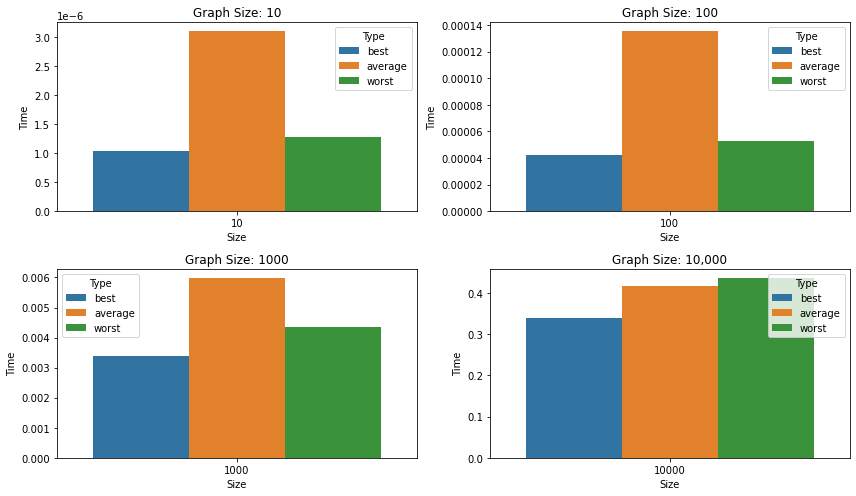

In [10]:
import seaborn as sb
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(12, 7))


axs[0, 0].set_title("Graph Size: 10")
axs[0, 1].set_title("Graph Size: 100")
axs[1, 0].set_title("Graph Size: 1000")
axs[1, 1].set_title("Graph Size: 10,000")


sb.barplot(data=results_10, y="Time", x="Size", hue="Type", ax=axs[0, 0])
sb.barplot(data=results_100, y="Time", x="Size", hue="Type", ax=axs[0, 1])
sb.barplot(data=results_1k, y="Time", x="Size", hue="Type", ax=axs[1, 0])
sb.barplot(data=results_10k, y="Time", x="Size", hue="Type", ax=axs[1, 1])

plt.tight_layout()

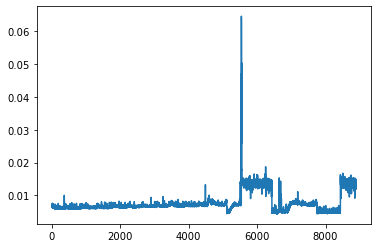

In [11]:
data2 = pd.read_csv("random.txt")
x = [i + 100 for i in range(len(data2))]
plt.plot(data2['time'])

In [11]:
import numpy as np
def ema(dataframe, interval, smoothing=2):
    '''
    Exponential Moving Average 
    '''
    multiplier = smoothing/(1 + interval)
    
    values = []
    ema_value = 0
    
    for i in range(interval):
        ema_value += dataframe[i]
        
        values.append(ema_value/(i+1))
    
    # Finding the Mean value for the initial ema
    ema_value = ema_value / interval
    
    # Extracting the remaining EMA
    for i in range(interval, len(dataframe)):
        ema_value = multiplier * dataframe[i] + (1 - multiplier) * ema_value
        values.append(ema_value)
    
    return np.array(values)

<b>Dijkstra Adjacency Matrix Code</b>

In [1]:
import sys
 
class Graph():
 
    def __init__(self, vertices):
        self.V = vertices
        self.graph = [[0 for column in range(vertices)]
                    for row in range(vertices)]
 
    def printSolution(self, dist):
        print("Vertex \tDistance from Source")
        for node in range(self.V):
            print(node, "\t", dist[node])
 

    def minDistance(self, dist, sptSet):
 
        # Initialize minimum distance for next node
        min = sys.maxsize
        min_index=-1
        # Search not nearest vertex not in the
        # shortest path tree
        for u in range(self.V):
            if dist[u] < min and sptSet[u] == False:
                min = dist[u]
                min_index = u
        return min_index


    def dijkstra(self, src):
 
        dist = [sys.maxsize] * self.V
        dist[src] = 0
        sptSet = [False] * self.V
 
        for cout in range(self.V):

            x = self.minDistance(dist, sptSet)
            if(x == -1):
                break

            sptSet[x] = True
 

            for y in range(self.V):
                if self.graph[x][y] > 0 and sptSet[y] == False and \
                dist[y] > dist[x] + self.graph[x][y]:
                        dist[y] = dist[x] + self.graph[x][y]
 
        #self.printSolution(dist)

    

Generate Test Case

In [60]:
import random

def create_graph(vertices, typ = "simple", edge_count=0):
    initialise = [[0 for column in range(vertices)]
                    for row in range(vertices)]
    
    if typ == "simple":
        for i in range(vertices-1):
            initialise[i][i+1] = random.randint(1, 5000)

        initialise[i+1][0] = random.randint(1, 5000)
    
    elif typ == "rnd":
        edges = random.randint(1, vertices * (vertices-1))
        while(edges > 0):
            v1 = random.randint(0, vertices-1)
            v2 = random.randint(0, vertices-1)
            
            if v1 != v2 and initialise[v1][v2] == 0:
                initialise[v1][v2] = random.randint(1, 5000)
                edges-=1
                
    elif typ == "full":
        for i in range(vertices):
            for j in range(vertices):
                if i != j:
                    initialise[i][j] = random.randint(1, 5000)
    
    elif typ == "simple_edge_test":
        # ADD TO PARAMETER
        i=0
        for i in range(edge_count):
            initialise[i][i+1] = random.randint(1, 5000)
        
        initialise[i+1][0] = random.randint(1, 5000)
                
    return initialise

In [70]:
import timeit

timing = []

for i in range(10, 1000):
    size = 1000
    input_graph = create_graph(size, "simple_edge_test", i)
    source_node = 0
    g = Graph(size)
    g.graph = input_graph

    start = timeit.default_timer()
    g.dijkstra(source_node);
    end = timeit.default_timer()

    time_taken = end - start
    timing.append(time_taken)
        

<b>Visualising the results</b>

In [4]:
import pandas as pd
res = pd.read_csv('pydata.txt', delimiter=',')
res_10 = res[res['size'] == 10]
res_100 = res[res['size'] == 100]
res_1k = res[res['size'] == 1000]
res_10k = res[res['size'] == 10000]

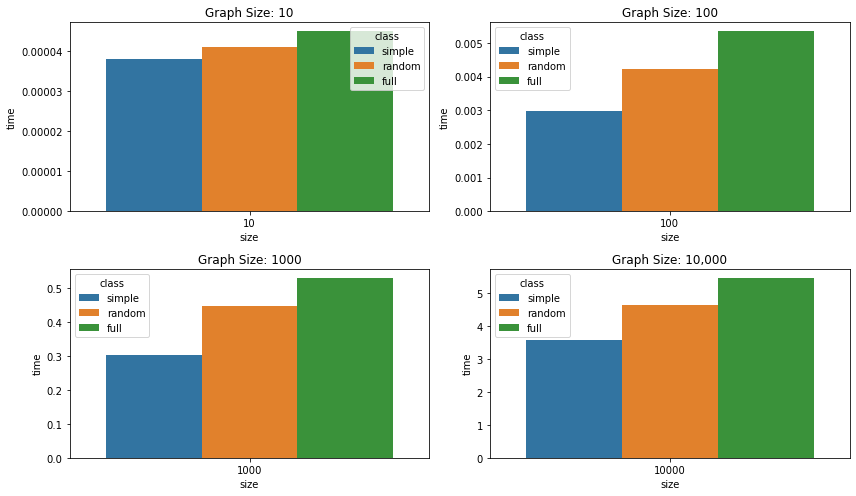

In [5]:
import seaborn as sb
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(12, 7))


axs[0, 0].set_title("Graph Size: 10")
axs[0, 1].set_title("Graph Size: 100")
axs[1, 0].set_title("Graph Size: 1000")
axs[1, 1].set_title("Graph Size: 10,000")

axs[0,0].ticklabel_format(style='plain', axis='y')
axs[0,1].ticklabel_format(style='plain', axis='y')
axs[1,1].ticklabel_format(style='plain', axis='y')
axs[1,0].ticklabel_format(style='plain', axis='y')

sb.barplot(data=res_10, y="time", x="size", hue="class", ax=axs[0, 0])
sb.barplot(data=res_100, y="time", x="size", hue="class", ax=axs[0, 1])
sb.barplot(data=res_1k, y="time", x="size", hue="class", ax=axs[1, 0])
sb.barplot(data=res_10k, y="time", x="size", hue="class", ax=axs[1, 1])


plt.tight_layout()

Text(0, 0.5, 'Time Taken')

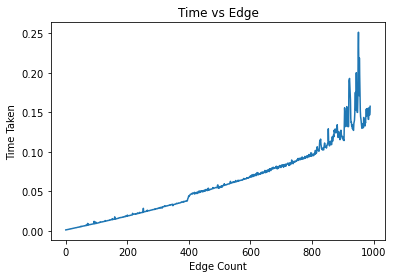

In [96]:
plt.plot(timing)
plt.title("Time vs Edge")
plt.xlabel("Edge Count")
plt.ylabel("Time Taken")